Stack Overflow is an online community for developers to learn and share knowledge. This community has been growing tremendously in the recent past. And, every year, Stack Overflow conducts a developer survey where it asks developers using Stack Overflow a couple of questions. These results are shared with the public after masking the user-specific data.


The **StackOverflow Developer Survey** data contains ~80K records from 2019 and ~65K records from 2020. Our 50% of Respondence are from US, India, UK, Germany and Canada.

- ### This Data can benefit companies in hiring process and more importantly understand users pattern.
- ### Developers can also use the results to know Current and future trending technologies, Prefered plaform or to understand developers data with high compensation and many other things.

<center><h1>---KeyPoints---</h1></center>

### Prefered Lanuages to start with! Majority of developers tend to know these.

- HTML/CSS and JavaScript are two prefered front-end languages known by developers.
- Almost 55% of developers knows SQL. MySQL is most prefered SQL to start with, Secoundary choice could be PostgreSQL and than MongoDB.
- Python leads as back-end language. Moreover there is 4% increase in ratio of people knowing Python from 2019 to 2020.

 ---
- Let's talk more about javaScript, JQuery is primary framework choosen by developers. ReactJS could be secoundary choice. AngularJS is not prefered as there is major decrease in desireness of developers as well as developers knowking Angular.
- Linux, Windows and Docker are three prefered platform to work on. Desireness of AWS is also increasing and reached upto 31% this year.

### Job Seekers

- The first thing developer sees when looking for New JOB is Better Compensation and Opportunity to work with new technologies.
- If two companies providing same compansation and same tech to work on then personal Growth, future opprtunities and flexible hours would be factors that depends most.
- It’s interesting to see that a higher percentage of women over men consider changing jobs because of trouble with their teammates, manager, and/or company leadership.

### Country

- On an Average, Developers in united states are payed 7times more than Indian developers. That's huge amount! right?
- Top ~300 Develpers with highest compensation are from United States, only two of them are from india and Canada

### High salary developers survey!

- Master's degree is not necessary, infact most of developers are with bachelor's degree!
- Most of them have a full-time job where as Some of developers among them are working as freelancer.
- These developers desire to work with Linux and AWS and they prefer Windows less. As far as language, Database and Framework is concern i didn't conclude any different pattern.
- Age is not as important as you think. What i mean is, there are developers who start coding at age of 27 or 21. Few of them have 1year of experience in coding though they are earning higher and 30% of them have less than 3 years of experince in coding.

### Is open source development linked with increased income?
The answer is Yes! Increased contribution to open-source, resulted in increased income.
- Open-source contributors adhere to the community rules of code and follow the best practices laid out by communities.
- They make friends with fellow contributors who can help with referrals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')

In [2]:
df1 = pd.read_csv('developer_survey_2019/survey_results_public.csv')
df2 = pd.read_csv('developer_survey_2020/survey_results_public.csv')

In [3]:
print(df1.shape, df2.shape)

(88883, 85) (64461, 61)


In [4]:
df1['year'] = 2019
df2['year'] = 2020

In [5]:
print(df1.shape, df2.shape)

(88883, 86) (64461, 62)


In [6]:
df = df2[['LanguageWorkedWith','LanguageDesireNextYear']]
df.dropna(inplace=True)
df_python = df[df.LanguageWorkedWith.str.contains('Python')]

In [7]:
fd = df1[['LanguageWorkedWith','LanguageDesireNextYear']]
fd.dropna(inplace=True)
fd_python = fd[fd.LanguageWorkedWith.str.contains('Python')]

In [8]:
def computefreq(temp,total):
    dic = {}
    for item in temp.values:
        ar = item.split(';')
        for val in ar:
            if val in dic:
                dic[val] += 1
            else:
                dic[val] = 1
    for item in dic.keys():
        dic[item] = round((dic[item]/total) * 100,1)
    sorted_list = sorted(dic.items(), key = lambda kv:(kv[1], kv[0]))[::-1]
    return sorted_list

In [9]:
def freqplot(column,cdict1,cdict2,tit):
    freqs = computefreq(df1[column].dropna(),df1[column].dropna().shape[0])
    freqs_2020 = computefreq(df2[column].dropna(),df2[column].dropna().shape[0])
    
    top_tech_2019 = [freqs[0][0], freqs[1][0], freqs[2][0], freqs[3][0], freqs[4][0], freqs[5][0], freqs[6][0], freqs[7][0], freqs[8][0], freqs[9][0]]
    top_per_2019 = [freqs[0][1], freqs[1][1], freqs[2][1], freqs[3][1], freqs[4][1], freqs[5][1], freqs[6][1], freqs[7][1], freqs[8][1], freqs[9][1]]
    top_tech_2020 = [freqs_2020[0][0], freqs_2020[1][0], freqs_2020[2][0], freqs_2020[3][0], freqs_2020[4][0], freqs_2020[5][0], freqs_2020[6][0], freqs_2020[7][0], freqs_2020[8][0], freqs_2020[9][0]]
    top_per_2020 = [freqs_2020[0][1], freqs_2020[1][1], freqs_2020[2][1], freqs_2020[3][1], freqs_2020[4][1], freqs_2020[5][1], freqs_2020[6][1], freqs_2020[7][1], freqs_2020[8][1], freqs_2020[9][1]]
    
    plt.figure(figsize=(15,9))

    plt.subplot(2,1,1)
    bars = plt.bar(top_tech_2019,top_per_2019,color='lightslategrey')
    for itm in cdict1.keys():
        bars[itm].set_color(cdict1[itm])


    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    for bar in bars:
        plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(bar.get_height()) + '%', 
                     ha='center', color='w', fontsize=11,fontweight='demi')
    
    plt.title(tit+' in 2019',fontsize='xx-large');


    plt.subplot(2,1,2)
    bars = plt.bar(top_tech_2020,top_per_2020,color='lightslategrey')
    for itm in cdict2.keys():
        bars[itm].set_color(cdict2[itm])


    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    for bar in bars:
        plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(bar.get_height()) + '%', 
                     ha='center', color='w', fontsize=11,fontweight='demi')

    plt.title(tit+' in 2020',fontsize='xx-large');

    plt.tight_layout(pad=3)

# Question -1 : Percentage of people knowing technologies with primary language known as Python!

In [10]:
df.shape

(53712, 2)

In [11]:
tech_dict_2020 = computefreq(df.LanguageWorkedWith,df.shape[0])

In [12]:
tech_dict_2019 = computefreq(fd.LanguageWorkedWith,fd.shape[0])

In [13]:
print("In 2020, Percentage of people knowing Python also knows.....\n")
print(f"{tech_dict_2020[0][1]}% of people knows {tech_dict_2020[0][0]}\n{tech_dict_2020[1][1]}% of people knows {tech_dict_2020[1][0]}\n{tech_dict_2020[2][1]}% of people knows {tech_dict_2020[2][0]}")
print(f"{tech_dict_2020[3][1]}% of people knows {tech_dict_2020[3][0]}\n{tech_dict_2020[4][1]}% of people knows {tech_dict_2020[4][0]}\n{tech_dict_2020[5][1]}% of people knows {tech_dict_2020[5][0]}")

In 2020, Percentage of people knowing Python also knows.....

67.6% of people knows JavaScript
63.0% of people knows HTML/CSS
54.8% of people knows SQL
44.3% of people knows Python
40.2% of people knows Java
33.5% of people knows Bash/Shell/PowerShell


In [14]:
print("In 2019, Percentage of people knowing Python also knows.....\n")
print(f"{tech_dict_2019[0][1]}% of people knows {tech_dict_2019[0][0]}\n{tech_dict_2019[1][1]}% of people knows {tech_dict_2019[1][0]}\n{tech_dict_2019[2][1]}% of people knows {tech_dict_2019[2][0]}")
print(f"{tech_dict_2019[3][1]}% of people knows {tech_dict_2019[3][0]}\n{tech_dict_2019[4][1]}% of people knows {tech_dict_2019[4][0]}\n{tech_dict_2019[5][1]}% of people knows {tech_dict_2019[5][0]}")

In 2019, Percentage of people knowing Python also knows.....

67.6% of people knows JavaScript
63.3% of people knows HTML/CSS
54.3% of people knows SQL
41.6% of people knows Python
40.9% of people knows Java
36.8% of people knows Bash/Shell/PowerShell


# Question -2 : Percentage of people Desire to know technologies with primary language known as Python!

In [15]:
tech_desire = computefreq(df.LanguageDesireNextYear,df.shape[0])

In [16]:
tech_desire_2019 = computefreq(fd.LanguageDesireNextYear,fd.shape[0])

In [17]:
print("Percentage of people Desire to know technologies in 2020\n")

print(f"{tech_desire[0][1]}% of people Wants to know {tech_desire[0][0]}\n{tech_desire[1][1]}% of people Wants to know {tech_desire[1][0]}\n{tech_desire[2][1]}% of people Wants to know {tech_desire[2][0]}")
print(f"{tech_desire[3][1]}% of people knows {tech_desire[3][0]}\n{tech_desire[4][1]}% of people Wants to Wants to know {tech_desire[4][0]}\n{tech_desire[5][1]}% of people Wants to know {tech_desire[5][0]}")

Percentage of people Desire to know technologies in 2020

49.3% of people Wants to know Python
48.4% of people Wants to know JavaScript
38.4% of people Wants to know HTML/CSS
37.0% of people knows SQL
31.8% of people Wants to Wants to know TypeScript
25.3% of people Wants to know C#


In [18]:
print("Percentage of people Desire to know technologies in 2019\n")

print(f"{tech_desire_2019[0][1]}% of people Wants to know {tech_desire_2019[0][0]}\n{tech_desire_2019[1][1]}% of people Wants to Wants to know {tech_desire_2019[1][0]}\n{tech_desire_2019[2][1]}% of people Wants to know {tech_desire_2019[2][0]}")
print(f"{tech_desire_2019[3][1]}% of people Wants to know {tech_desire_2019[3][0]}\n{tech_desire_2019[4][1]}% of people Wants to Wants to know {tech_desire_2019[4][0]}\n{tech_desire_2019[5][1]}% of people Wants to know {tech_desire_2019[5][0]}")

Percentage of people Desire to know technologies in 2019

53.2% of people Wants to know JavaScript
47.6% of people Wants to Wants to know Python
43.6% of people Wants to know HTML/CSS
40.0% of people Wants to know SQL
28.3% of people Wants to Wants to know TypeScript
27.9% of people Wants to know Java


- ### Which technologies are known by developers?
- ### which technologies to developers desire to know?
- ### Whats trending?

## Database Worked With!

- Prefered database to start with is MySQL
- Secoundry options would be PostgreSQL and MongoDB

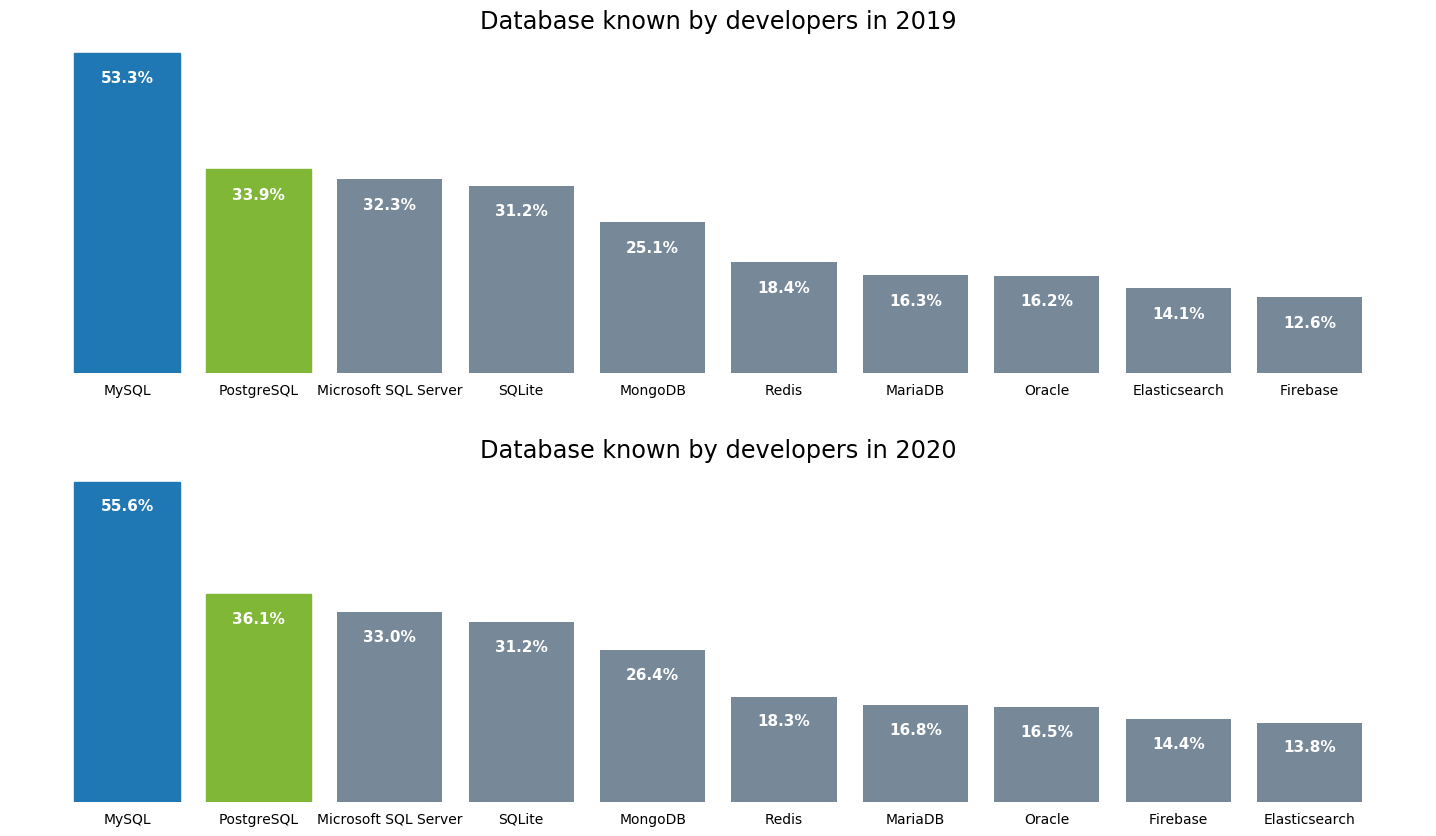

In [19]:
freqplot('DatabaseWorkedWith',{0:'#1F77B4',1:'#80B736'},{0:'#1F77B4',1:'#80B736'},'Database known by developers')

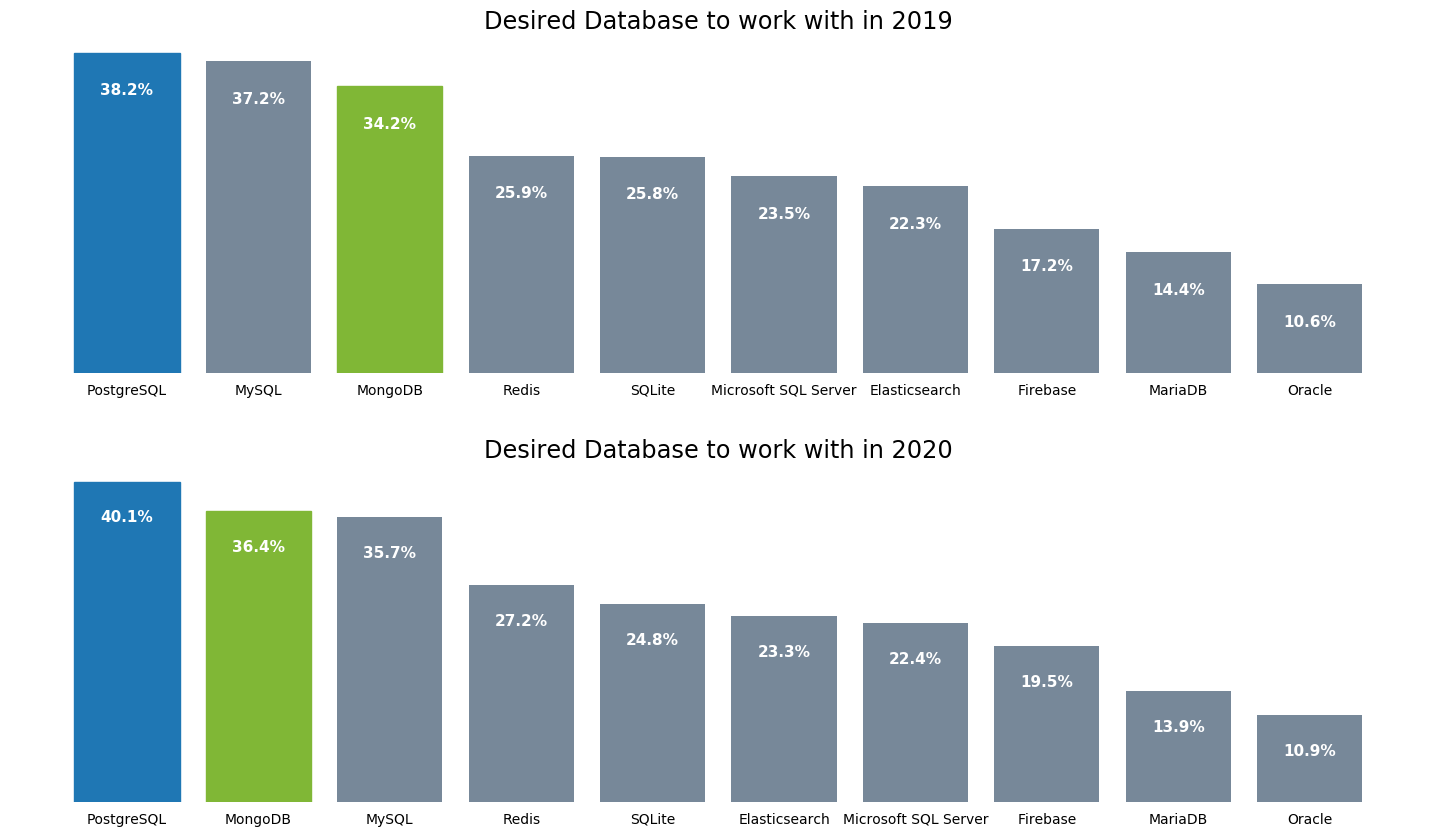

In [20]:
freqplot('DatabaseDesireNextYear',{0:'#1F77B4',2:'#80B736'},{0:'#1F77B4',1:'#80B736'},'Desired Database to work with')

# Languages Known by devlopers

- HTML/CSS and JavaScript are two prefered front-end languages known by developers.
- Almost 55% of them knows SQL.
- Python leads as back-end language. Moreover there is 4% increase in ratio of people knowing Python from 2019 to 2020.

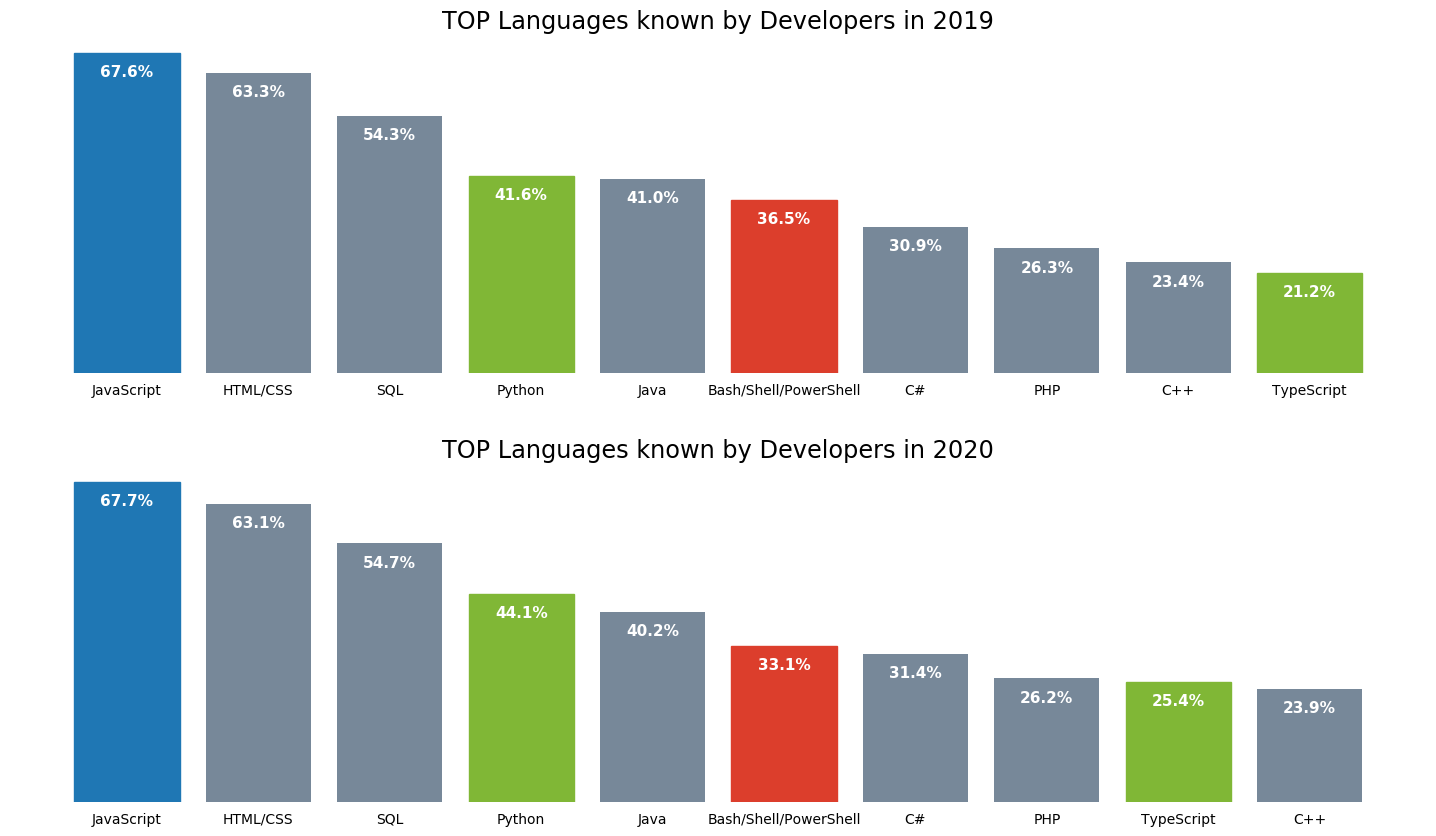

In [21]:
freqplot('LanguageWorkedWith',{0:'#1F77B4',3:'#80B736',5:'#DC3E2C',9:'#80B736'},{0:'#1F77B4',3:'#80B736',5:'#DC3E2C',8:'#80B736'},'TOP Languages known by Developers')

# Languages Desire to know

- Python is the most desired language in 2020 and has 3% increase in desire rate.
- Developers lack the interest in java as there is 4% decrease in desire rate.

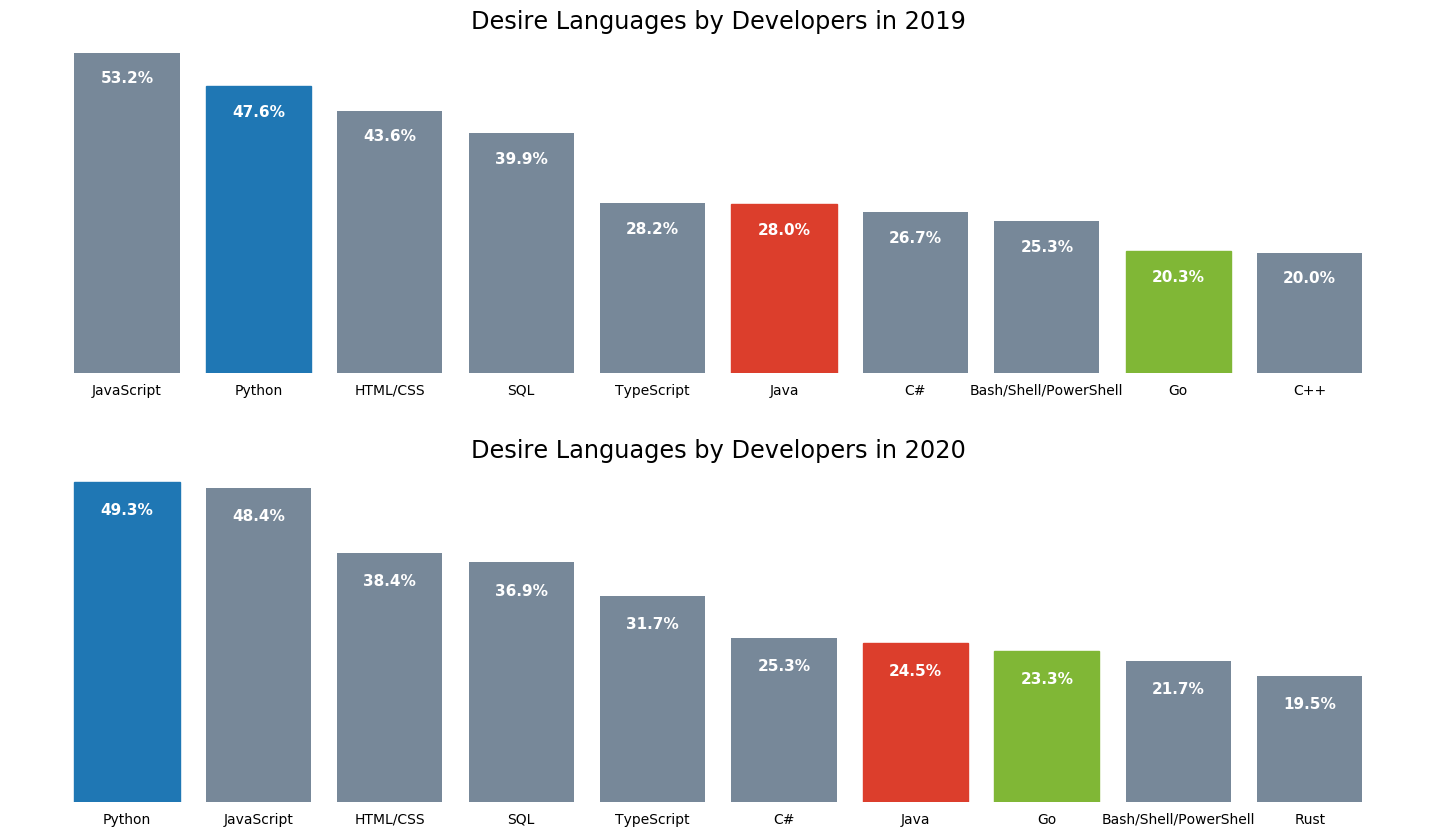

In [22]:
freqplot('LanguageDesireNextYear',{1:'#1F77B4',8:'#80B736',5:'#DC3E2C'},{0:'#1F77B4',7:'#80B736',6:'#DC3E2C'},'Desire Languages by Developers')

# Platform worked On

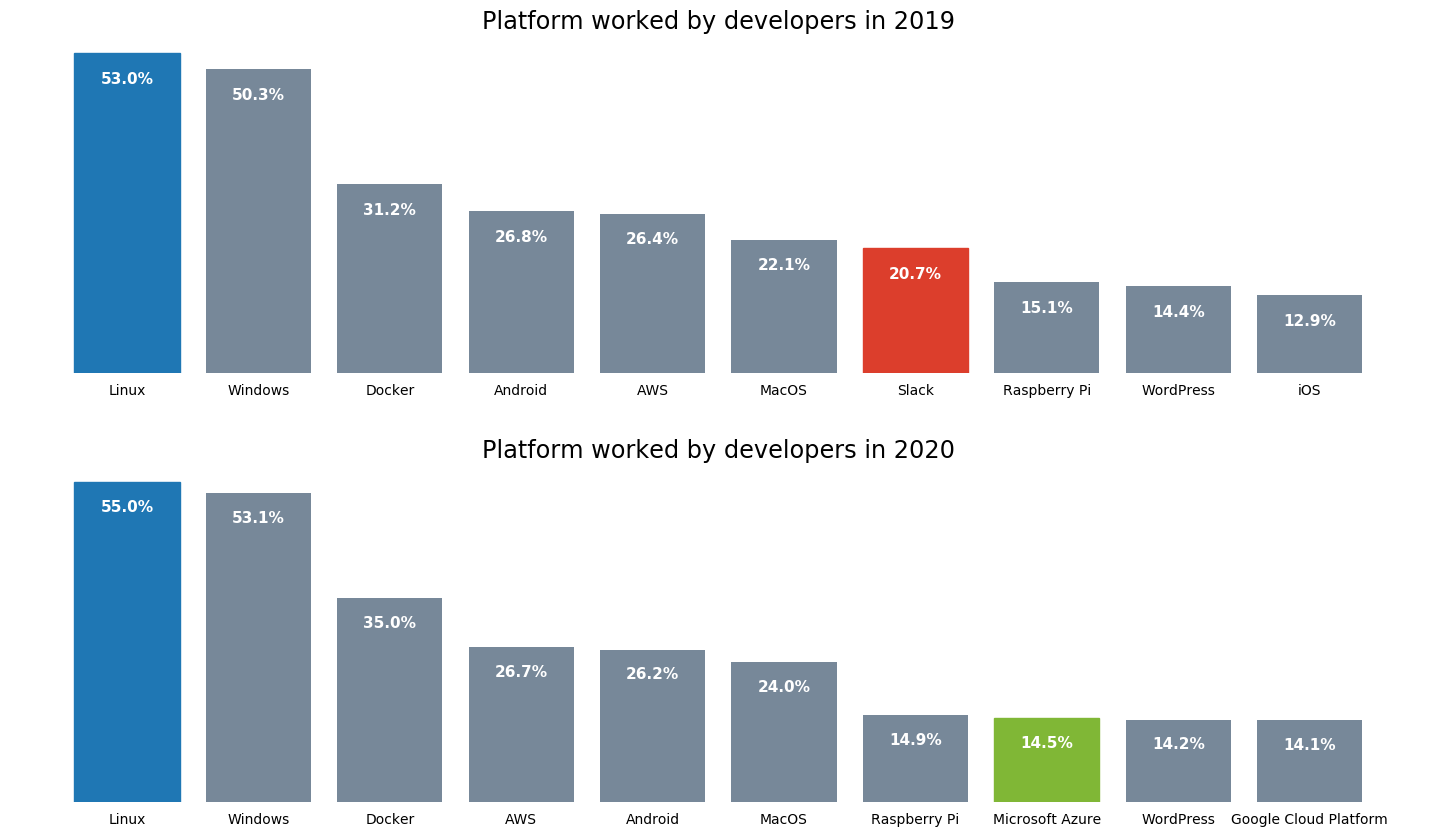

In [23]:
freqplot('PlatformWorkedWith',{0:'#1F77B4',6:'#DC3E2C'},{0:'#1F77B4',7:'#80B736'},'Platform worked by developers')

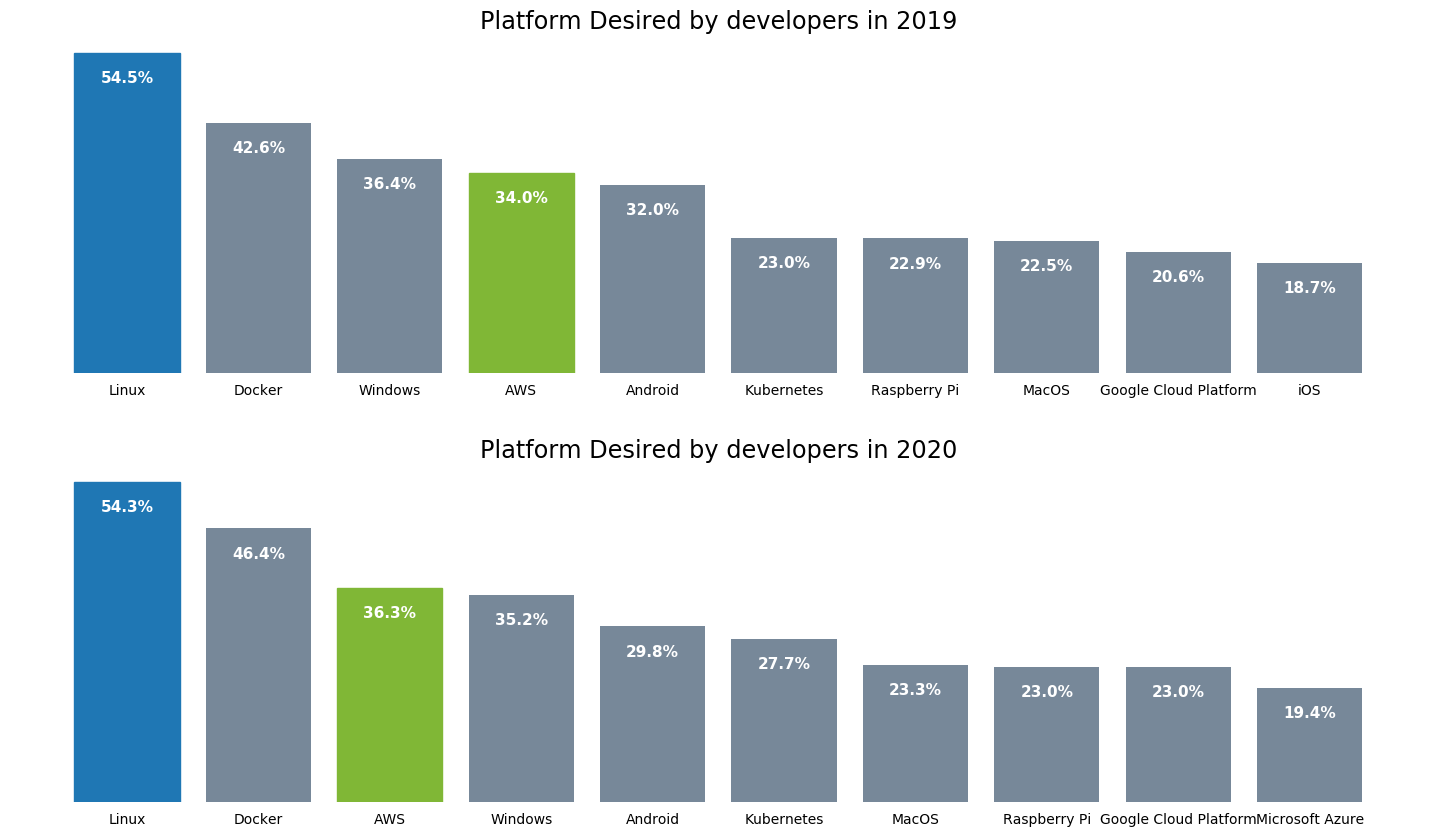

In [24]:
freqplot('PlatformDesireNextYear',{0:'#1F77B4',3:'#80B736'},{0:'#1F77B4',2:'#80B736'},'Platform Desired by developers')

# Webframe worked on 

In [25]:
df1.rename(columns={'WebFrameWorkedWith':'WebframeWorkedWith','WebFrameDesireNextYear':'WebframeDesireNextYear'},inplace=True)

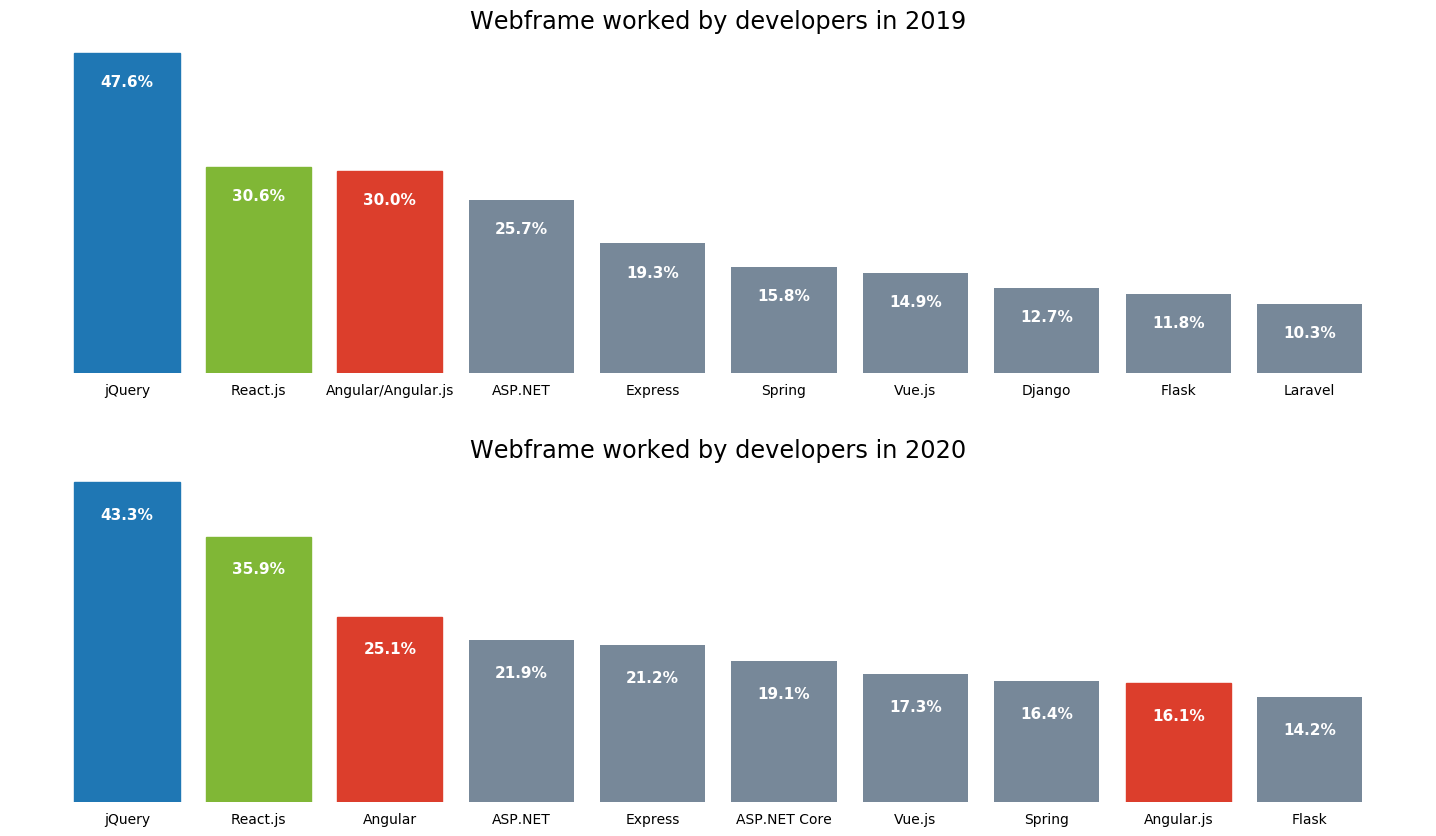

In [26]:
freqplot('WebframeWorkedWith',{0:'#1F77B4',1:'#80B736',2:'#DC3E2C'},{0:'#1F77B4',1:'#80B736',2:'#DC3E2C',8:'#DC3E2C'},'Webframe worked by developers')

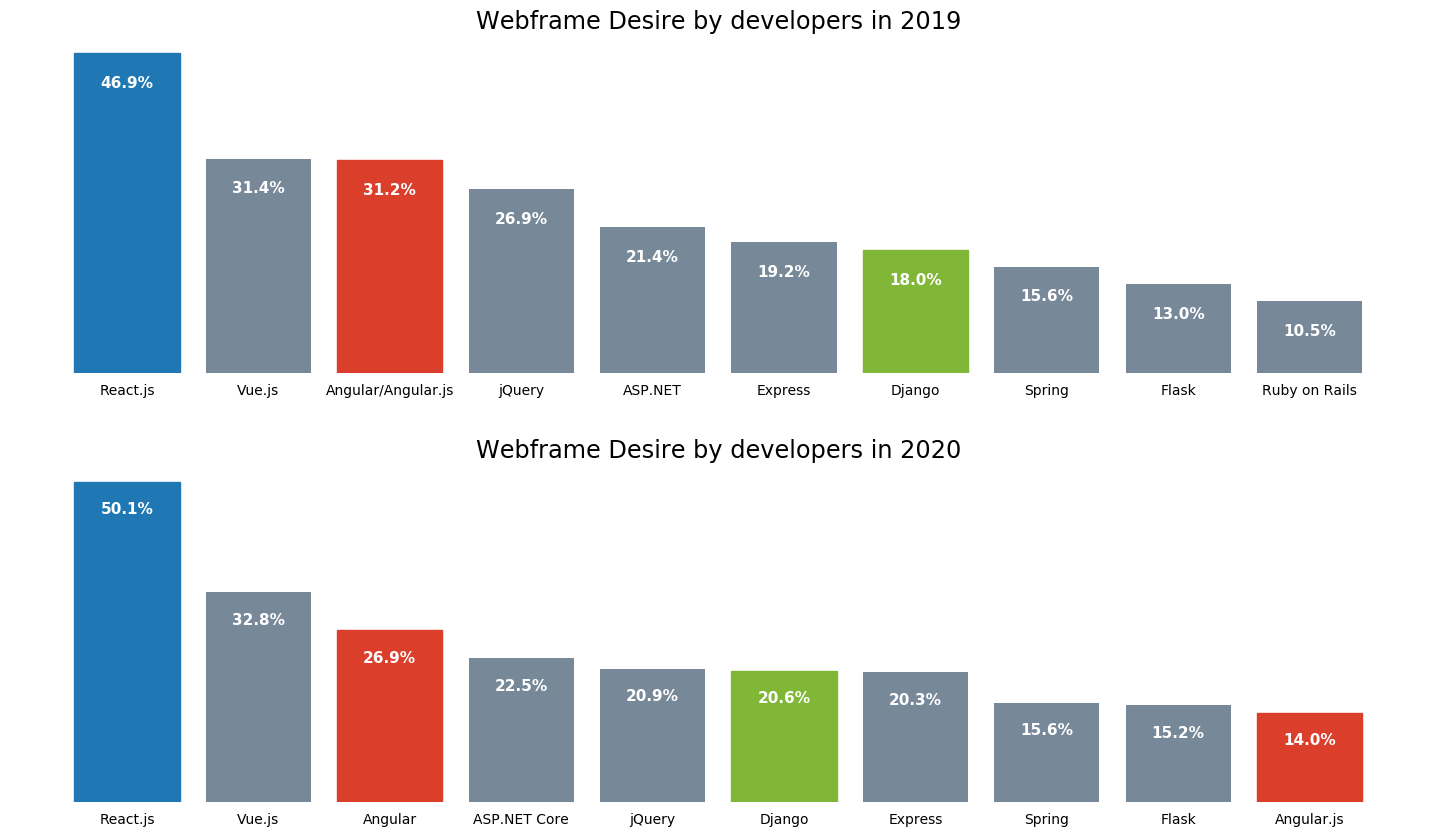

In [27]:
freqplot('WebframeDesireNextYear',{0:'#1F77B4',6:'#80B736',2:'#DC3E2C'},{0:'#1F77B4',5:'#80B736',2:'#DC3E2C',9:'#DC3E2C'},'Webframe Desire by developers')

# Other technologies and framework 

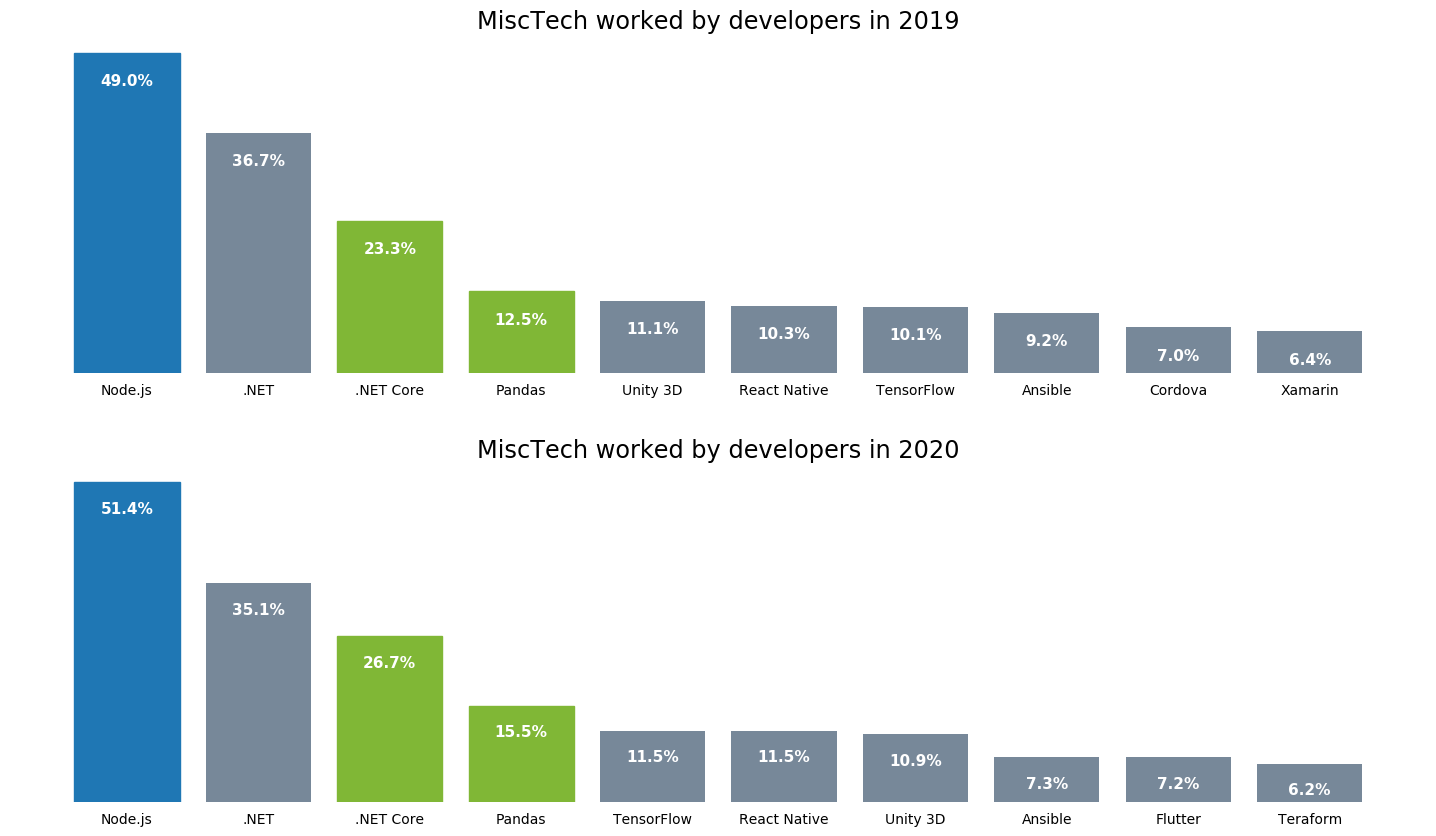

In [28]:
freqplot('MiscTechWorkedWith',{0:'#1F77B4',3:'#80B736',2:'#80B736'},{0:'#1F77B4',3:'#80B736',2:'#80B736'},'MiscTech worked by developers')

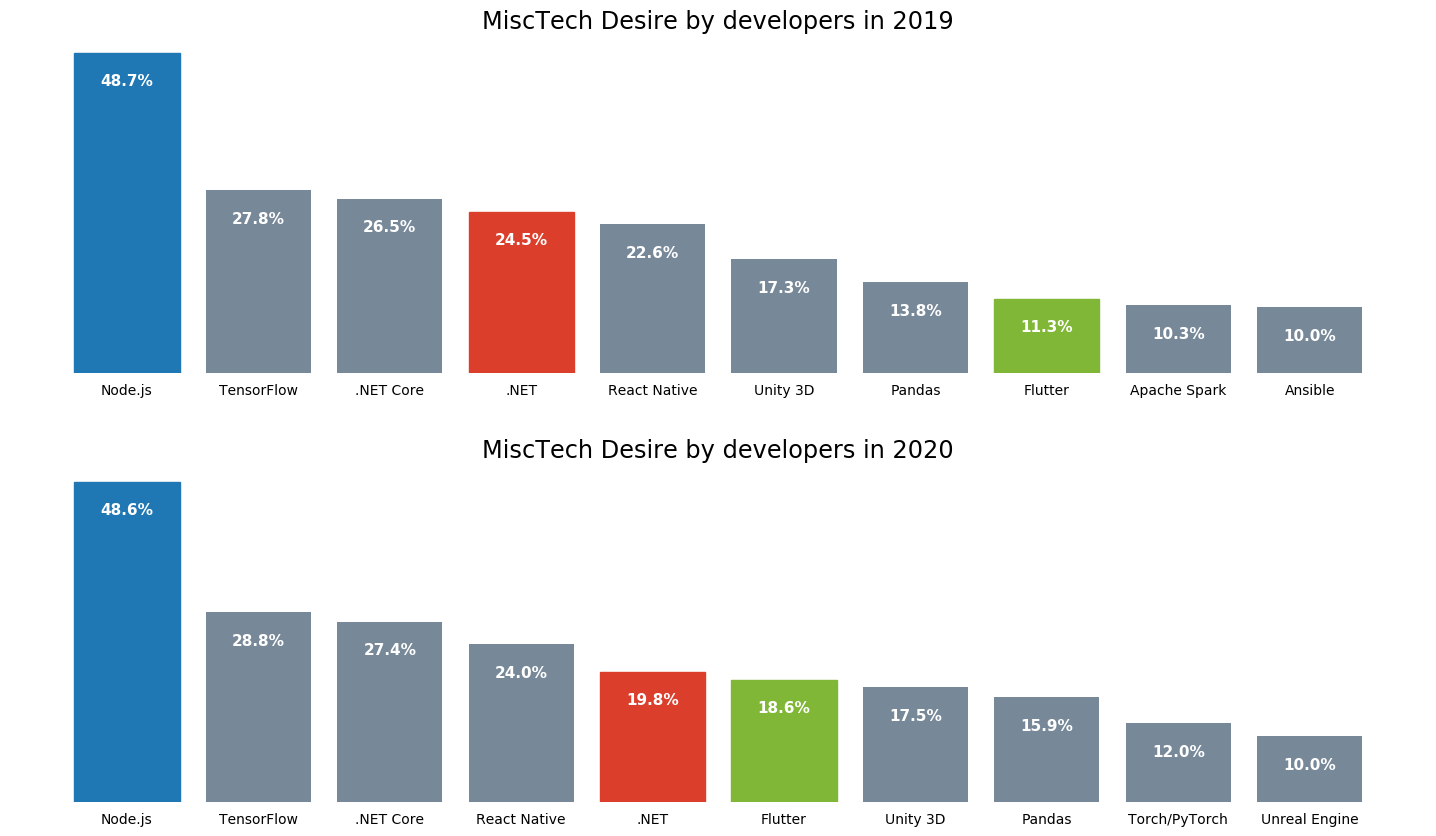

In [29]:
freqplot('MiscTechDesireNextYear',{0:'#1F77B4',3:'#DC3E2C',7:'#80B736'},{0:'#1F77B4',4:'#DC3E2C',5:'#80B736'},'MiscTech Desire by developers')

# Collabration Tool used by developers

In [30]:
df2['NEWCollabToolsWorkedWith'] = df2['NEWCollabToolsWorkedWith'].replace(np.NaN,'None')

In [31]:
df2['NEWCollabToolsDesireNextYear'] = df2['NEWCollabToolsDesireNextYear'].replace(np.NaN,'None')

In [32]:
computefreq(df2['NEWCollabToolsWorkedWith'].dropna(),len(df2['NEWCollabToolsWorkedWith'].dropna()))

[('Github', 67.9),
 ('Slack', 43.5),
 ('Jira', 39.1),
 ('Google Suite (Docs, Meet, etc)', 34.1),
 ('Gitlab', 30.3),
 ('Confluence', 26.6),
 ('Trello', 24.3),
 ('Microsoft Teams', 21.0),
 ('None', 18.0),
 ('Microsoft Azure', 12.2),
 ('Stack Overflow for Teams', 4.7),
 ('Facebook Workplace', 2.5)]

In [33]:
computefreq(df2['NEWCollabToolsDesireNextYear'].dropna(),len(df2['NEWCollabToolsDesireNextYear'].dropna()))

[('Github', 57.4),
 ('Slack', 32.8),
 ('None', 26.6),
 ('Gitlab', 26.3),
 ('Google Suite (Docs, Meet, etc)', 24.7),
 ('Jira', 24.5),
 ('Trello', 15.1),
 ('Confluence', 14.2),
 ('Microsoft Teams', 13.0),
 ('Microsoft Azure', 12.2),
 ('Stack Overflow for Teams', 10.2),
 ('Facebook Workplace', 2.4)]

# How frequently do developer learn a new language or framework?

In [34]:
df2.NEWLearn.value_counts()/len(df2.NEWLearn.dropna()) * 100

Every few months        37.285419
Once a year             36.849135
Once every few years    23.655531
Once a decade            2.209915
Name: NEWLearn, dtype: float64

# Primary operating system Worked on!


In [35]:
df2.OpSys.value_counts(dropna=False)

Windows        27170
Linux-based    14932
MacOS          14075
NaN             8233
BSD               51
Name: OpSys, dtype: int64

# Influence over new tech purchase

In [36]:
df2.PurchaseWhat.value_counts(dropna=False)

NaN                                 25097
I have little or no influence       16987
I have some influence               15379
I have a great deal of influence     6998
Name: PurchaseWhat, dtype: int64

# Before buying New purchases

In [37]:
df2.NEWPurchaseResearch = df2.NEWPurchaseResearch.replace(np.NaN,'None')

In [38]:
computefreq(df2['NEWPurchaseResearch'],len(df2['NEWPurchaseResearch']))

[('Start a free trial', 44.6),
 ('None', 42.1),
 ('Ask developers I know/work with', 39.3),
 ('Visit developer communities like Stack Overflow', 37.0),
 ('Read ratings or reviews on third party sites like G2Crowd', 17.3),
 ('Research companies that have advertised on sites I visit', 7.1),
 ('Research companies that have emailed me', 3.2)]

# When develper got stuck on a problem

In [39]:
df2.NEWStuck = df2.NEWStuck.replace(np.NaN,'None')

In [40]:
computefreq(df2['NEWStuck'],len(df2['NEWStuck']))

[('Visit Stack Overflow', 77.3),
 ('Do other work and come back later', 46.4),
 ('Watch help / tutorial videos', 45.0),
 ('Call a coworker or friend', 42.5),
 ('Go for a walk or other physical activity', 36.9),
 ('None', 14.7),
 ('Play games', 12.8),
 ('Meditate', 10.0),
 ('Panic', 9.3),
 ('Visit another developer community (please name):', 8.7)]

# When you find purple line when searched for a solution

In [41]:
df2.NEWPurpleLink.value_counts(dropna=False)

Hello, old friend    28262
Indifferent          10005
NaN                   9658
Amused                8710
Annoyed               7826
Name: NEWPurpleLink, dtype: int64

# What drives developers to look for a new job?

In [42]:
computefreq(df2['NEWJobHunt'].dropna(),len(df2['NEWJobHunt'].dropna()))

[('Better compensation', 70.0),
 ('Wanting to work with new technologies', 58.5),
 ('Curious about other opportunities', 57.1),
 ('Growth or leadership opportunities', 52.9),
 ('Better work/life balance', 48.3),
 ('Trouble with leadership at my company', 26.8),
 ('Looking to relocate', 26.3),
 ('Having a bad day (or week or month) at work', 20.3),
 ('Trouble with my direct manager', 17.0),
 ('Just because', 12.3),
 ('Trouble with my teammates', 11.7),
 ('Wanting to share accomplishments with a wider network', 10.3)]

In [43]:
df_man = df2[df2.Gender == 'Man']
df_woman = df2[df2.Gender == 'Woman']
print(f"Num of man: {len(df_man)} and Num of Woman: {len(df_woman)}")

Num of man: 46013 and Num of Woman: 3844


In [93]:
#Man
print("Gender == Man")
computefreq(df_man['NEWJobHunt'].dropna(),len(df_man['NEWJobHunt'].dropna()))

Gender == Man


[('Better compensation', 71.0),
 ('Wanting to work with new technologies', 59.3),
 ('Curious about other opportunities', 57.6),
 ('Growth or leadership opportunities', 52.9),
 ('Better work/life balance', 48.4),
 ('Trouble with leadership at my company', 26.8),
 ('Looking to relocate', 26.3),
 ('Having a bad day (or week or month) at work', 20.1),
 ('Trouble with my direct manager', 16.7),
 ('Just because', 12.2),
 ('Trouble with my teammates', 11.2),
 ('Wanting to share accomplishments with a wider network', 10.3)]

In [94]:
#woman
print("Gender == Woman")
computefreq(df_woman['NEWJobHunt'].dropna(),len(df_woman['NEWJobHunt'].dropna()))

Gender == Woman


[('Better compensation', 63.9),
 ('Curious about other opportunities', 59.2),
 ('Growth or leadership opportunities', 56.6),
 ('Wanting to work with new technologies', 54.7),
 ('Better work/life balance', 48.5),
 ('Trouble with leadership at my company', 30.8),
 ('Looking to relocate', 28.4),
 ('Having a bad day (or week or month) at work', 25.6),
 ('Trouble with my direct manager', 22.5),
 ('Trouble with my teammates', 18.2),
 ('Just because', 11.2),
 ('Wanting to share accomplishments with a wider network', 9.1)]

# Annual Salary(USD)

In [46]:
df2.ConvertedComp.dropna().mean()

103756.05014961446

In [47]:
print(f"Man average salary: {round(df_man.ConvertedComp.dropna().mean(),1)}")

Man average salary: 103615.9


In [48]:
print(f"Woman average salary: {round(df_woman.ConvertedComp.dropna().mean(),1)}")

Woman average salary: 98300.5


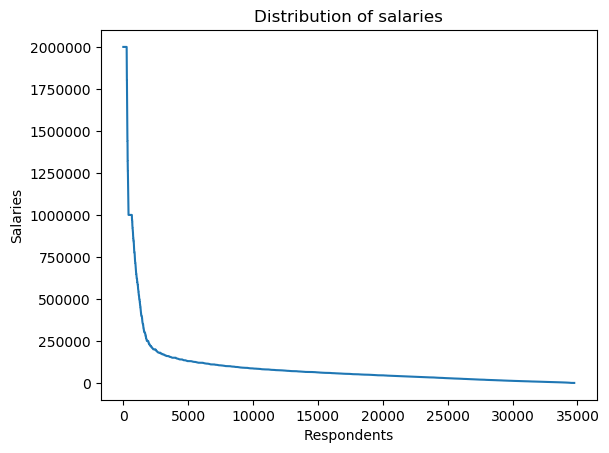

In [49]:
df2.ConvertedComp.sort_values(ascending=False).reset_index(drop=True).plot(title="Distribution of salaries");
plt.ylabel("Salaries")
plt.xlabel("Respondents");

In [50]:
df2["SalaryBins"] = pd.cut(x=df2.ConvertedComp.dropna(), bins = [0,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000,2000000], labels=['0-200K', '200K-400K', '400K-600K', '600K-800K', '800K-1M', '1M-1.2M', '1.2M-1.4M', '1.4M-1.6M', '1.6M-1.8M', '1.8M-2M']) 

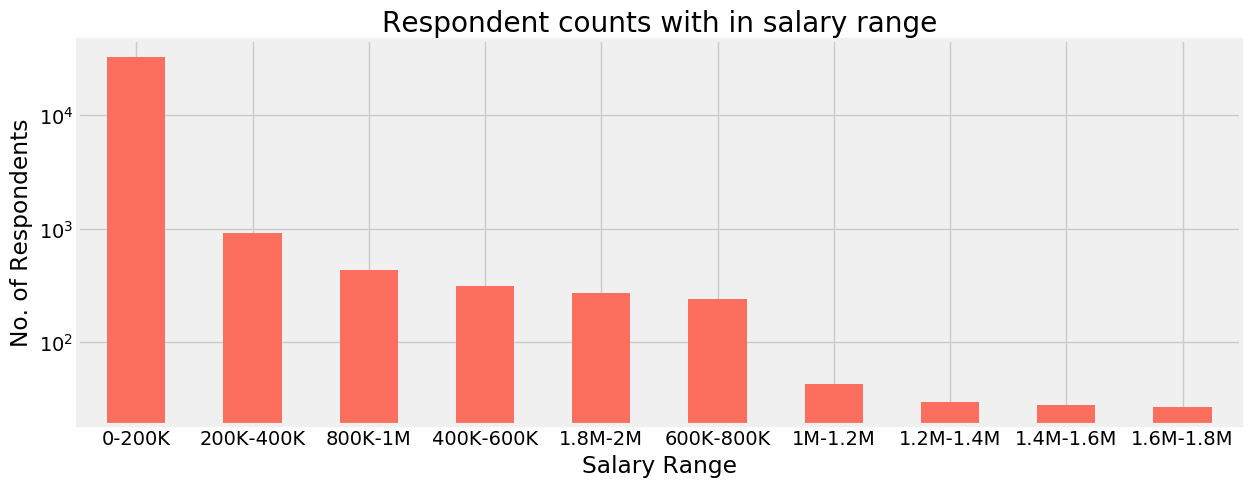

In [51]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
df2.SalaryBins.value_counts().plot(kind="bar",color='#FC6F5F');
plt.xlabel("Salary Range")
plt.xticks(rotation=0)
plt.yscale('log')
plt.ylabel("No. of Respondents")
plt.title("Respondent counts with in salary range");

# Developers with high Salary

In [52]:
df_hs = df2[df2.ConvertedComp > 1400000]

In [95]:
print("How frequent do they learn new Tech?")
df_hs.NEWLearn.value_counts()

How frequent do they learn new Tech?


Once a year             138
Every few months         84
Once every few years     79
Once a decade             2
Name: NEWLearn, dtype: int64

In [96]:
print("Where do they live?")
df_hs.Country.value_counts()

Where do they live?


United States    318
India              2
Canada             2
Italy              1
Nomadic            1
Nepal              1
Name: Country, dtype: int64

In [97]:
print("Their Employment Status!")
df_hs.Employment.value_counts()

Their Employment Status!


Employed full-time                                      314
Independent contractor, freelancer, or self-employed      7
Employed part-time                                        4
Name: Employment, dtype: int64

In [98]:
print("What is their highest education level?")
df_hs.EdLevel.value_counts()

What is their highest education hevel?


Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          197
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        48
Some college/university study without earning a degree                                 39
Associate degree (A.A., A.S., etc.)                                                    19
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     10
Other doctoral degree (Ph.D., Ed.D., etc.)                                              5
Professional degree (JD, MD, etc.)                                                      3
Primary/elementary school                                                               2
Name: EdLevel, dtype: int64

In [99]:
print("Their professional title!")
computefreq(df_hs.DevType.dropna(),len(df_hs.DevType.dropna()))

Their professional title!


[('Developer, full-stack', 59.8),
 ('Developer, back-end', 58.2),
 ('Developer, front-end', 43.0),
 ('Developer, desktop or enterprise applications', 27.6),
 ('Database administrator', 16.7),
 ('Developer, mobile', 16.1),
 ('DevOps specialist', 14.9),
 ('Designer', 14.2),
 ('Data or business analyst', 13.6),
 ('System administrator', 13.3),
 ('Data scientist or machine learning specialist', 13.0),
 ('Engineer, data', 12.7),
 ('Developer, embedded applications or devices', 12.4),
 ('Developer, QA or test', 8.4),
 ('Engineer, site reliability', 7.1),
 ('Product manager', 6.8),
 ('Engineering manager', 6.5),
 ('Developer, game or graphics', 6.2),
 ('Educator', 4.6),
 ('Scientist', 4.3),
 ('Senior executive/VP', 3.1),
 ('Academic researcher', 2.8),
 ('Marketing or sales professional', 1.9)]

In [58]:
print("Platform Woked With:")
computefreq(df_hs.PlatformWorkedWith.dropna(),len(df_hs.DatabaseWorkedWith.dropna()))

Platform Woked With:


[('Linux', 62.4),
 ('Windows', 56.0),
 ('Docker', 50.0),
 ('AWS', 46.8),
 ('MacOS', 40.1),
 ('Microsoft Azure', 25.9),
 ('Raspberry Pi', 23.4),
 ('Android', 23.0),
 ('Google Cloud Platform', 17.4),
 ('WordPress', 15.6),
 ('Kubernetes', 15.6),
 ('iOS', 14.9),
 ('Heroku', 14.2),
 ('Slack Apps and Integrations', 12.1),
 ('Arduino', 11.3),
 ('IBM Cloud or Watson', 2.5)]

In [59]:
print('Desired Platform:')
computefreq(df_hs.PlatformDesireNextYear.dropna(),len(df_hs.DatabaseDesireNextYear.dropna()))

Desired Platform:


[('Linux', 59.3),
 ('AWS', 57.6),
 ('Docker', 56.3),
 ('Windows', 39.4),
 ('Kubernetes', 37.7),
 ('MacOS', 34.2),
 ('Raspberry Pi', 32.9),
 ('Microsoft Azure', 32.5),
 ('Android', 31.6),
 ('Google Cloud Platform', 27.3),
 ('iOS', 18.2),
 ('Arduino', 14.3),
 ('Heroku', 13.0),
 ('Slack Apps and Integrations', 10.4),
 ('WordPress', 9.5),
 ('IBM Cloud or Watson', 6.5)]

In [60]:
df_hs.YearsCodePro.replace({'Less than 1 year':1,'More than 50 years':50,np.NaN:0},inplace=True)

In [61]:
print(f"Percentage of developer having less than 3 years of experience in coding {(df_hs.YearsCodePro.astype(int) <=3).sum()/len(df_hs) * 100}")

Percentage of developer having less than 3 years of experience in coding 30.461538461538463


# Employment Status

In [62]:
df2.Employment.value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [63]:
df_student = df2[df2.Employment == 'Student']
df_fulltime = df2[df2.Employment == 'Employed full-time']

# JobSeek

In [64]:
df2.JobSeek.value_counts()

I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64

In [65]:
df2[df2.Employment == 'Employed full-time'].JobSeek.value_counts()

I’m not actively looking, but I am open to new opportunities    22351
I am not interested in new job opportunities                    10321
I am actively looking for a job                                  4992
Name: JobSeek, dtype: int64

In [66]:
df2[df2.Employment == 'Student'].JobSeek.value_counts()

I’m not actively looking, but I am open to new opportunities    3318
I am actively looking for a job                                 1361
I am not interested in new job opportunities                    1143
Name: JobSeek, dtype: int64

In [67]:
df2[df2.Employment == 'Independent contractor, freelancer, or self-employed'].JobSeek.value_counts()

I’m not actively looking, but I am open to new opportunities    2662
I am not interested in new job opportunities                    1085
I am actively looking for a job                                  848
Name: JobSeek, dtype: int64

# Country

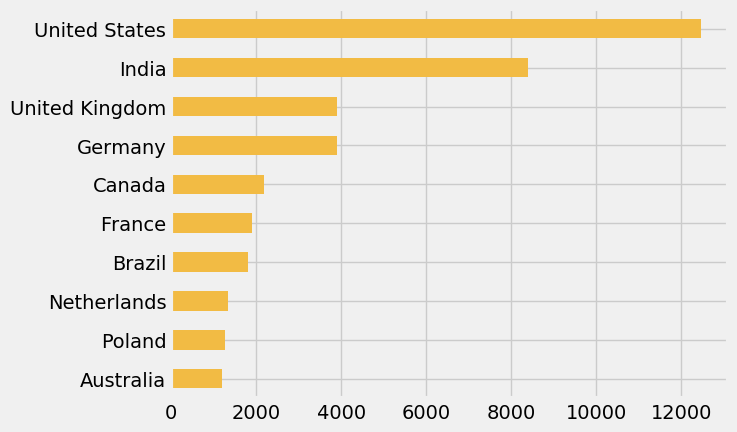

In [68]:
df2.Country.value_counts()[0:10][::-1].plot(kind='barh',color='#F2BB44');

In [69]:
(df2.Country.dropna().value_counts(normalize=True)*100)[0:10]

United States     19.460919
India             13.114933
United Kingdom     6.080659
Germany            6.071295
Canada             3.419590
France             2.962292
Brazil             2.837433
Netherlands        2.096079
Poland             1.994631
Australia          1.885379
Name: Country, dtype: float64

### Average salary of developers in Top Countries

In [70]:
print(f"Average Salary of developer in United States: {df2[df2.Country == 'United States'].ConvertedComp.dropna().mean()}")
print()
print(f"Average Salary of developer in United Kingdom: {df2[df2.Country == 'United Kingdom'].ConvertedComp.dropna().mean()}")
print()
print(f"Average Salary of developer in Canada: {df2[df2.Country == 'Canada'].ConvertedComp.dropna().mean()}")
print()
print(f"Average Salary of developer in Germany: {df2[df2.Country == 'Germany'].ConvertedComp.dropna().mean()}")
print()
print(f"Average Salary of developer in India: {df2[df2.Country == 'India'].ConvertedComp.dropna().mean()}")

Average Salary of developer in United States: 208826.49644259078

Average Salary of developer in United Kingdom: 140849.0741885626

Average Salary of developer in Canada: 115101.77546468402

Average Salary of developer in Germany: 92508.64733881436

Average Salary of developer in India: 28751.27136431784


In [71]:
comp = df2[['YearsCodePro','ConvertedComp']].dropna()

In [72]:
comp.YearsCodePro.replace({'Less than 1 year':1,'More than 50 years':50},inplace=True)

In [73]:
comp.YearsCodePro = comp.YearsCodePro.astype(int)

In [74]:
comp.corr()

,YearsCodePro,ConvertedComp
YearsCodePro,1.000000,0.114284
ConvertedComp,0.114284,1.000000


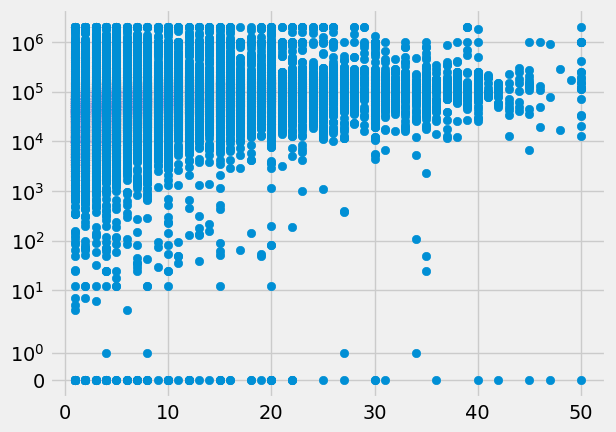

In [75]:
plt.scatter(x=comp['YearsCodePro'],y=comp['ConvertedComp'])
plt.yscale('symlog')

In [76]:
df2.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [81]:
df2.Age.dropna().unique()

array([ 25. ,  31. ,  36. ,  30. ,  22. ,  23. ,  49. ,  53. ,  27. ,
        45. ,  32. ,  24. ,  40. ,  18. ,  39. ,  29. ,  16. ,  34. ,
        19. ,  35. ,  20. ,  38. ,  57. ,  28. ,  17. ,  44. ,  21. ,
        48. ,  26. ,  42. ,  55. ,  37. ,  50. ,  41. ,  64. ,  63. ,
        33. ,  43. ,  51. ,  60. ,  59. ,  62. ,  69. ,  52. ,  46. ,
        49.5,  56. ,  47. ,  15. ,  72. ,  13. ,  71. ,  54. ,  70. ,
        11. ,  14. ,  61. ,  26.8,  86. ,  58. ,  67. ,  94. ,  65. ,
        66. ,  84. ,  73. ,  78. ,  68. ,  99. ,  74. ,  12. ,  77. ,
        15.5,  85. ,  76. ,  35.7,  32.5,  81. ,  23.8,  97. ,  96. ,
        26.5,   3. ,  24.5,  14.7,  34.5,   5. ,   1. ,  20.5,  79. ,
       279. ,  22.5,  27.5,  32.8,  10. ,  89. ,  80. ,  98. ,  19.8,
         7. ,  21.5,  31.5,  88. ,  39.5,  16.5,  75. ,  83. ,  23.4,
        95. ,  14.5])

In [91]:
df2["AgeBins"] = pd.cut(x=df2.Age.dropna(), bins = [1,10,15,20,25,30,35,40,50,60,70])

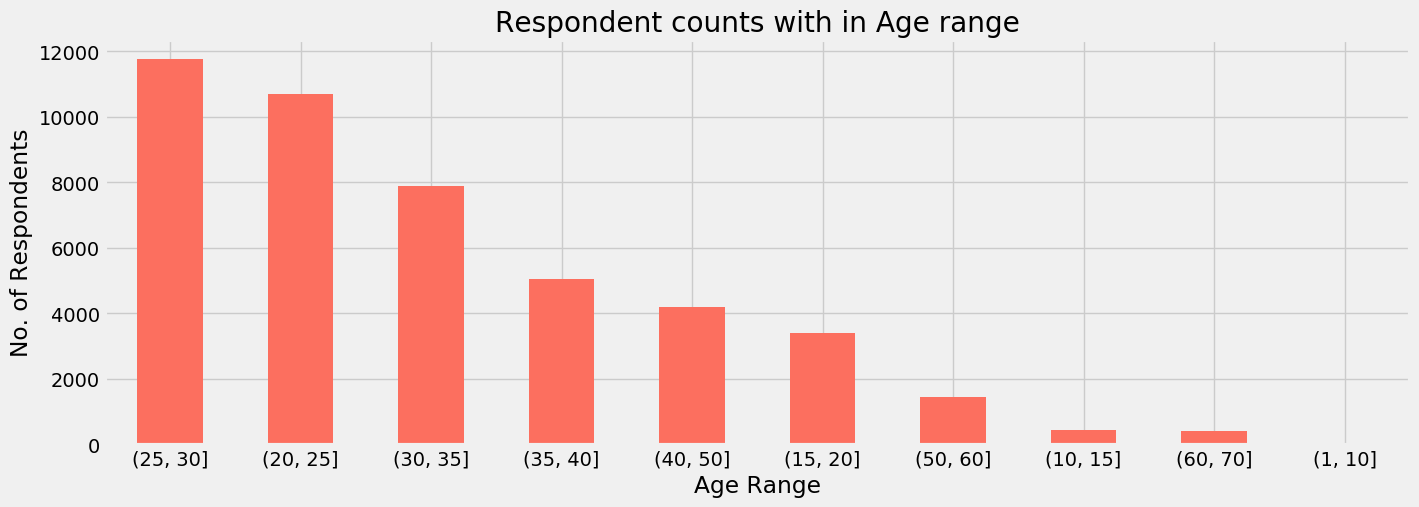

In [92]:
plt.figure(figsize=(15,5))
df2.AgeBins.value_counts().plot(kind="bar",color='#FC6F5F');
plt.xlabel("Age Range")
plt.xticks(rotation=0)
plt.ylabel("No. of Respondents")
plt.title("Respondent counts with in Age range");